In [2]:
import os, random
import ntpath
import SimpleITK
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# Loading dataset

We do not load the images directly to the dataset, as this resulted in a file of 11GB (which means 11GB of memory wasted). Instead we will load the paths of the image, and load the image when performing batch creation.

In [ ]:
# Loading data from pickle:
data = pd.read_pickle("train-data-filelist.pkl")

In [5]:
data.head(5)

,fissuremask,image,label,lungmask,name,completeness
0,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a06,52.0410
1,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a13,69.0858
2,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a00,20.2700
3,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a15,70.1147
4,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a,/projects/0/ismi2018/FINALPROJECTS/CHESTCT_FIS...,a21,76.2946


## Example

Example loading a file 

Completeness:  79.3114


array([-1024, -1023, -1022, ...,   925,   931,   958], dtype=int16)

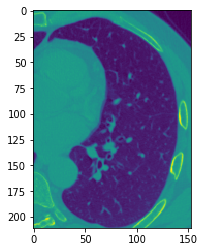

In [11]:
idx = 7

img = SimpleITK.ReadImage(data['image'][idx])
piece = SimpleITK.GetArrayViewFromImage(img)[240,:,:]
plt.imshow(piece)
print("Completeness: ", data['completeness'].iloc[idx])
np.unique(piece)

In [12]:
data.shape

(100, 6)